Model Traning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

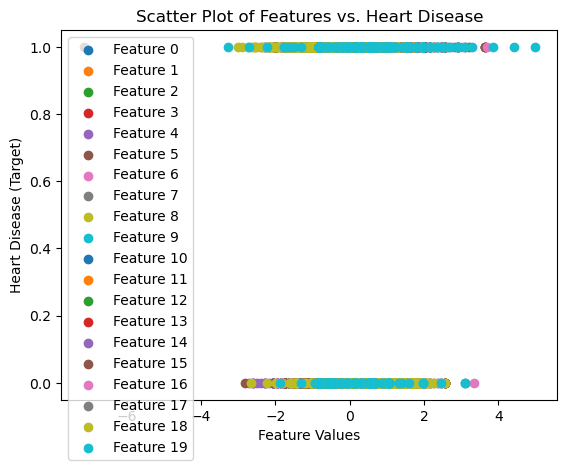

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df = pd.read_csv(r'\Users\alexc\Heart_failure_predictor\notebook\heart_failure.csv')
X = df.drop('HeartDisease', axis=1)  # Separate the features (X)
y = df['HeartDisease']  # Set 'y' to be the target variable column

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ],
    remainder="passthrough"  # Include the remaining columns as is
)

X = preprocessor.fit_transform(X)  # Fit and transform the features (X)

# Now, you can plot the transformed features against the target variable
for feature_idx in range(X.shape[1]):
    plt.scatter(X[:, feature_idx], y, label=f"Feature {feature_idx}")

plt.xlabel("Feature Values")
plt.ylabel("Heart Disease (Target)")
plt.title("Scatter Plot of Features vs. Heart Disease")
plt.legend()
plt.show()




In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[ 0.          1.          0.         ...  1.81375843  2.24748845
  -0.08195566]
 [ 0.          1.          0.         ... -0.55134134  1.61871737
  -0.83243239]
 [ 0.          1.          1.         ...  1.81375843 -0.46408682
   0.10566353]
 ...
 [ 0.          1.          1.         ... -0.55134134  0.28257883
   0.4809019 ]
 [ 0.          1.          1.         ... -0.55134134 -0.73917417
  -0.83243239]
 [ 1.          0.          1.         ... -0.55134134 -0.26759586
   1.04375945]] [[ 1.          0.          0.         ... -0.55134134  1.65801556
  -0.83243239]
 [ 0.          1.          0.         ... -0.55134134 -0.26759586
  -0.83243239]
 [ 0.          1.          1.         ...  1.81375843 -0.5819814
   0.29328271]
 ...
 [ 0.          1.          1.         ...  1.81375843 -0.81777055
   0.57471149]
 [ 0.          1.          0.         ... -0.55134134  1.34363002
  -0.26957484]
 [ 0.          1.          1.         ... -0.55134134 -0.5819814
   0.10566353]] 795    0
25     0


In [7]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegressionFactory:
    @staticmethod
    def create_model(lr):
        # Return an instance of LogisticRegression with the given learning rate (lr)
        return LogisticRegression(lr)

class LogisticRegression:
    def __init__(self, lr):
        self.lr = lr
        self.w = None

    def fit(self, P, y):
        # Initializing weights and gradient descent
        self.w = np.zeros(P.shape[1])
        self.w[0] = 1
        grad_norm = 1

        while grad_norm > 0.002:
            # Computing the gradient descent
            grad_dis = np.matmul(P.transpose(), sigmoid(np.matmul(self.w, P.transpose())) - y)

            # Updating the weights using gradient descent
            self.w = self.w - self.lr * grad_dis

            # Compute the norm of the gradient descent
            grad_norm = np.linalg.norm(grad_dis)

    def predict(self, p):
        return sigmoid(np.sum(self.w * p))


accuracy_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = 0.05


model = LogisticRegressionFactory.create_model(lr) 
model.fit(X_train, y_train)

count = 0

    # Computing the predictions
for label, p in zip(y_test, X_test):
    prediction = model.predict(p)
    if prediction >= 0.5:
        predicted_label = 1
    else:
         predicted_label = 0
    if predicted_label == label:
        count += 1

    # Calculating the accuracy
    accuracy = count / len(y_test)
    accuracy_list.append(accuracy)


KeyboardInterrupt: 